8 10 0.333946990403057
10 12 0.33492252791859284
12 16 0.33448229120519507
16 20 0.3342078338394291
20 24 0.33458110811316566
24 32 0.3351667307058457
[0.33455124703088085] [0.0028467323093393742]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20
4 0.04564354645876384 20 24
5 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

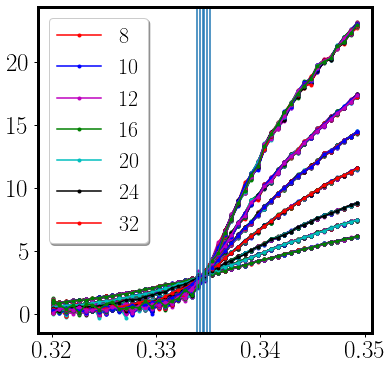

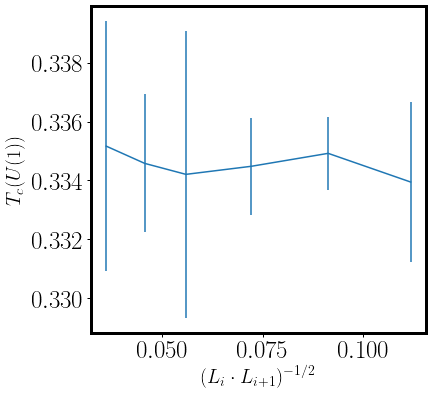

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit


plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

bare_Tc=[]
bare_Tc_err=[]
nu_list=[]
e=0
nu=0
h=1
rho=1
eta1=0
eta2=0.1
Hinit=1
blow=0.315
bhigh=0.355
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)


bmin=0.32
bmax=0.35
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jdiff_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}\cdot L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.34508968786610184
10 12 0.3446410111026845
12 16 0.3446944633481647
16 20 0.3453276920256534
20 24 0.3442313742354716
24 32 0.345287363593718
[0.33455124703088085, 0.3448785986952991] [0.0028467323093393742, 0.003472843944267551]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20
4 0.04564354645876384 20 24
5 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

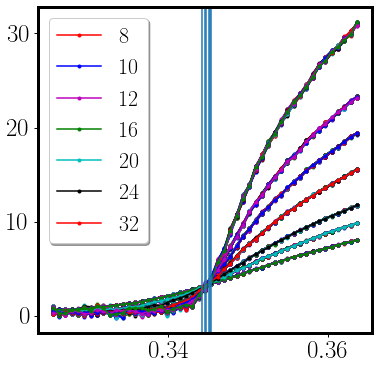

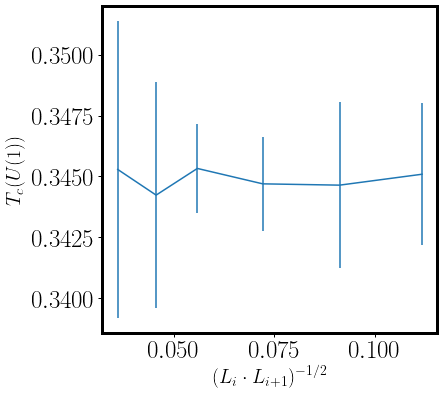

In [5]:
e=0
nu=0.2
h=1
rho=1
eta1=0
eta2=0.1
Hinit=1
blow=0.32
bhigh=0.37
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)


bmin=0.325
bmax=0.365
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jdiff_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}\cdot L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.3772282190954148
10 12 0.3773960503961483
12 16 0.37736766774841507
16 20 0.3775843905569812
20 24 0.37585971830291137
24 32 0.3753872849373387
[0.33455124703088085, 0.3448785986952991, 0.37680388850620156] [0.0028467323093393742, 0.003472843944267551, 0.004727338713750362]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20
4 0.04564354645876384 20 24
5 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

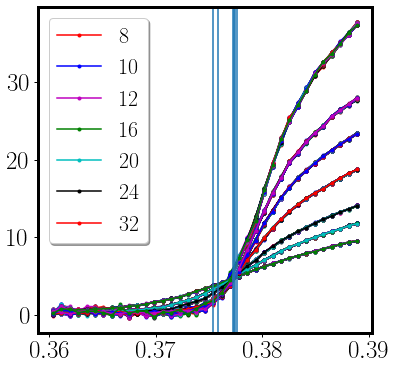

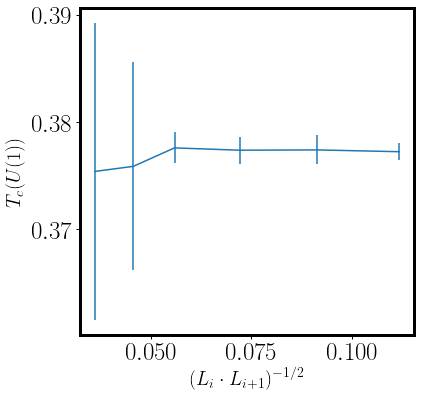

In [6]:
e=0
nu=0.4
h=1
rho=1
eta1=0
eta2=0.1
Hinit=1
blow=0.35
bhigh=0.4
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)


bmin=0.36
bmax=0.39
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jdiff_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}\cdot L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.4004697177009181
10 12 0.4010734082547824
12 16 0.4011961688807685
16 20 0.40046595247688976
20 24 0.3978664822750415
[0.33455124703088085, 0.3448785986952991, 0.37680388850620156, 0.40021434591768] [0.0028467323093393742, 0.003472843944267551, 0.004727338713750362, 0.0033163562016679275]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20
4 0.04564354645876384 20 24


<ErrorbarContainer object of 3 artists>

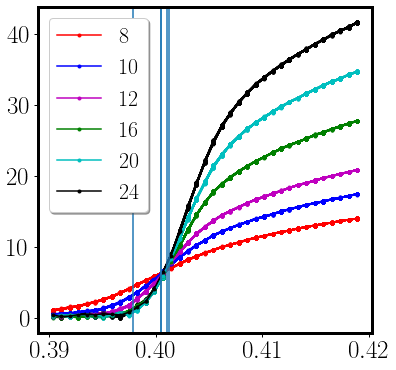

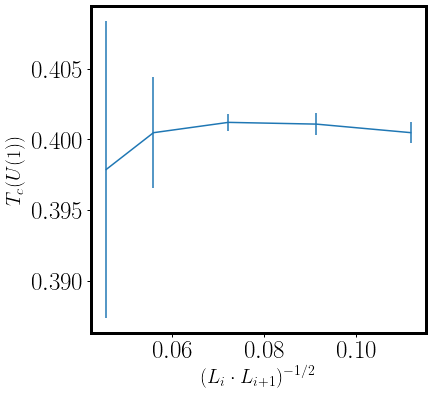

In [7]:
e=0
nu=0.5
h=1
rho=1
eta1=0
eta2=0.1
Hinit=1
blow=0.38
bhigh=0.43
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20, 24])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)


bmin=0.39
bmax=0.42
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jdiff_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}\cdot L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.41223825361734073
10 12 0.41190339954625993
12 16 0.4115256457291423
16 20 0.4101703194807193
[0.33455124703088085, 0.3448785986952991, 0.37680388850620156, 0.40021434591768, 0.41145940459336555] [0.0028467323093393742, 0.003472843944267551, 0.004727338713750362, 0.0033163562016679275, 0.0020928493876970515]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20


<ErrorbarContainer object of 3 artists>

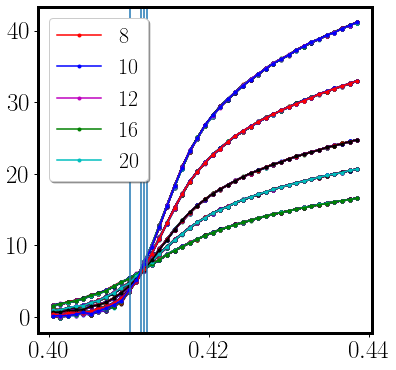

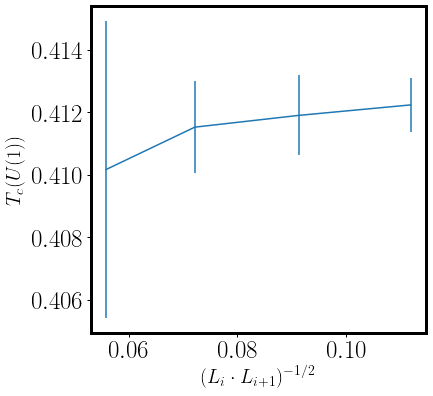

In [9]:
e=0
nu=0.55
h=1
rho=1
eta1=0
eta2=0.1
Hinit=1
blow=0.39
bhigh=0.45
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)


bmin=0.4
bmax=0.44
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jdiff_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}\cdot L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.4094559753408541
10 12 0.4089018209766463
12 16 0.4085123789090387
16 20 0.40775833396654754
[0.33455124703088085, 0.3448785986952991, 0.37680388850620156, 0.40021434591768, 0.41145940459336555, 0.40865712729827164] [0.0028467323093393742, 0.003472843944267551, 0.004727338713750362, 0.0033163562016679275, 0.0020928493876970515, 0.004002588844466051]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20


<ErrorbarContainer object of 3 artists>

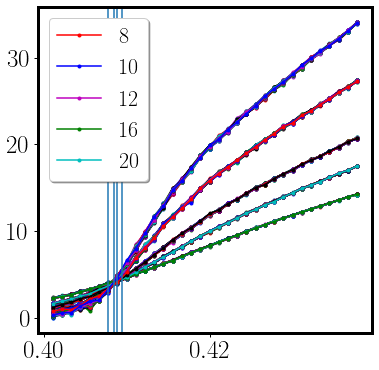

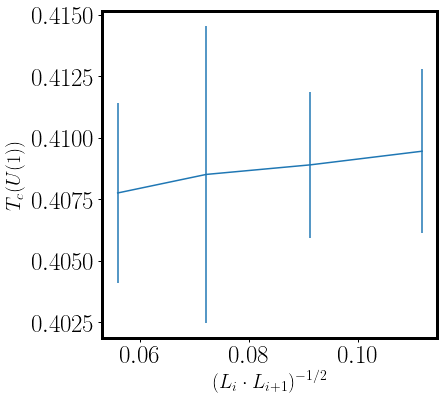

In [10]:
e=0
nu=0.6
h=1
rho=1
eta1=0
eta2=0.1
Hinit=1
blow=0.39
bhigh=0.46
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)


bmin=0.4
bmax=0.44
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jdiff_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}\cdot L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.4009492993179789
10 12 0.40070717615727225
12 16 0.3993329615234331
16 20 0.3987562379840297
[0.33455124703088085, 0.3448785986952991, 0.37680388850620156, 0.40021434591768, 0.41145940459336555, 0.40865712729827164, 0.3999364187456785] [0.0028467323093393742, 0.003472843944267551, 0.004727338713750362, 0.0033163562016679275, 0.0020928493876970515, 0.004002588844466051, 0.004274531849690523]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20


<ErrorbarContainer object of 3 artists>

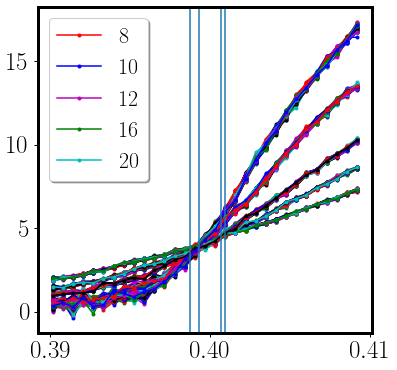

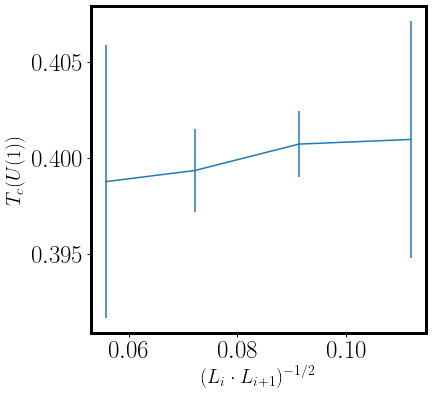

In [11]:
e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=0.1
Hinit=1
blow=0.38
bhigh=0.42
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)


bmin=0.39
bmax=0.41
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jdiff_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}\cdot L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

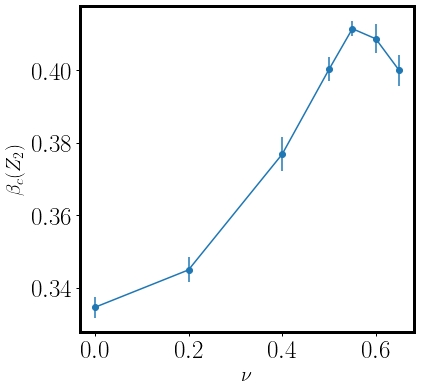

In [12]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xlabel(r"$\nu$")
ax2.set_ylabel(r"$\beta_c(Z_2)$")
ax2.errorbar(nu_list,bare_Tc, yerr= bare_Tc_err, fmt="o-")

np.savetxt("%s/betac_Z2_eta2%s.txt" %(folder_fig, eta2), (nu_list,bare_Tc, bare_Tc_err))